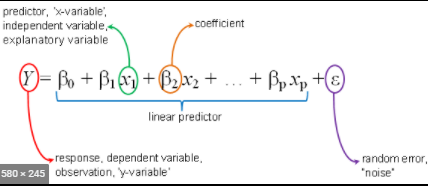

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
dataset =pd.read_csv("50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
X=dataset.iloc[:,0:-1].values
y=dataset.iloc[:,-1].values

### Dummy Variables

a gente não pode colocar as variaveis dummys ao mesmo tempo, pois gera colunas linearmente dependentes e atrapalha na predição (Trap Dummy Variables).
Solução, devemos omitir uma Dummy Variable

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [3])], remainder='passthrough')
X= np.array(ct.fit_transform(X))
# dataset[["State1"]]=np.array(ct.fit_transform(dataset[["State"]]))

In [17]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

**We cant scaling data set in multiple linear regression**
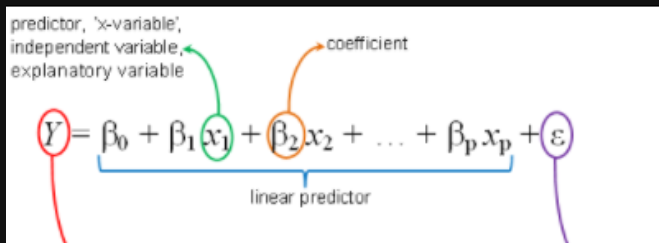
The coef already do the weight compensation

### Split

In [18]:
from sklearn.model_selection import train_test_split
_test_size = 1/5
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=_test_size, random_state=0)

### Training the Multipl Linear Regression model on the Train set
- do we need remove trap dummy variable?
    - No, because the current class (sklearn) this automatically. Keep in mind that in general you don't have to remove manually a dummy variable column because Scikit-Learn takes care of it.
- do we need to do a feature selection, using for example backward elimination?
    - No, because the current class (sklearn) do this automatically. Backward Elimination is irrelevant in Python, because the Scikit-Learn library automatically takes care of selecting the statistically significant features when training the model to make accurate predictions.

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [20]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)),1))
#Checking the score  
print('Train Score: ', regressor.score(X_train, y_train))  
print('Test Score: ', regressor.score(X_test, y_test))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]
Train Score:  0.9501847627493607
Test Score:  0.9347068473282303


### Applying Backward elimination

In [9]:
data_set = pd.read_csv("50_Startups.csv")
data_set.head()
#Extracting Independent and dependent Variable  
X= data_set.iloc[:, 0:1].values  
y= data_set.iloc[:, 4].values

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(X_train, y_train)

#Predicting the Test set result;  
y_pred= regressor.predict(X_test)

#Checking the score
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)),1))
print('Train Score: ', regressor.score(X_train, y_train))  
print('Test Score: ', regressor.score(X_test, y_test))

[[104667.28 103282.38]
 [134150.83 144259.4 ]
 [135207.8  146121.95]
 [ 72170.54  77798.83]
 [179090.59 191050.39]
 [109824.77 105008.31]
 [ 65644.28  81229.06]
 [100481.43  97483.56]
 [111431.75 110352.25]
 [169438.15 166187.94]]
Train Score:  0.9449589778363044
Test Score:  0.9464587607787219


Question 1: How do I use my multiple linear regression model to make a single prediction, for example, the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = California?

In [21]:
regressor.predict([[1, 0, 0, 160000, 130000, 300000]])

array([181566.92])

Question 2: How do I get the final regression equation y = b0 + b1 x1 + b2 x2 + ... with the final values of the coefficients?

In [22]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924854249
